# Composer Style Classification Using Deep Learning

### Team Members: 

- Kyle Fulford 

- Sasidev Mahendran 

- Sumitha Vellinalur Thattai 

In [50]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

In [51]:
import tensorflow as tf 
from tensorflow.keras import models
from tensorflow.keras.applications import *
from tensorflow.keras import layers
import tensorflow.keras.models as models
from torch.optim import Adam
from tensorflow import keras
from os import makedirs

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython.display as ipd
import random

import librosa
import librosa.display
from librosa import load, power_to_db
from librosa.display import specshow
from librosa.feature import melspectrogram

import os
import warnings 
warnings.filterwarnings('ignore')


In [5]:
DIR =''

In [ ]:
# To install the package, uncomment the below line

# pip install librosa

# Visualizing the Audio Files

(513, 862)


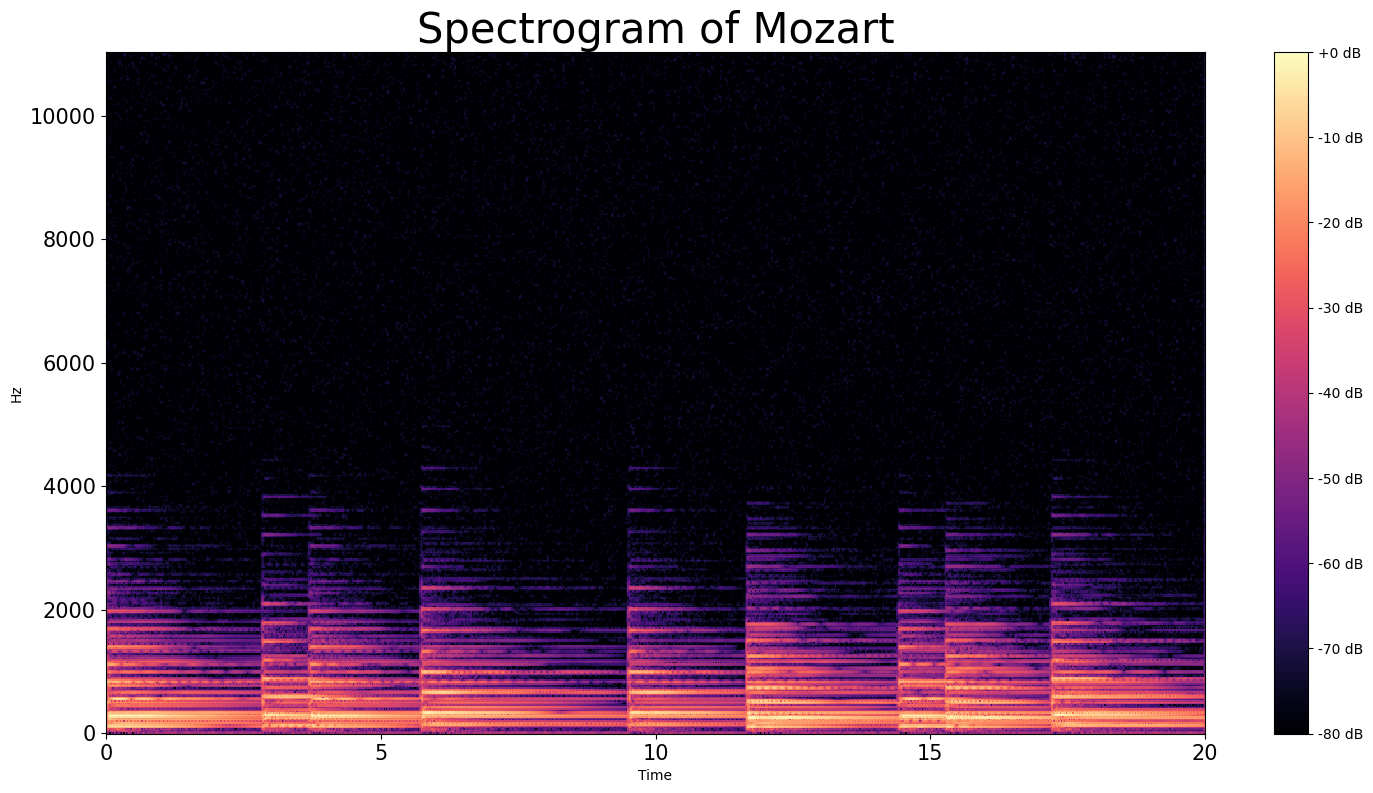

In [6]:
s, sr=librosa.load(DIR + 'train/mozart/5000mozart_mz_331_1.wav', sr=None)

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(s, n_fft=1024)), ref=np.max)
print(D.shape)
librosa.display.specshow(D, y_axis='linear',  x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Mozart', fontsize=30)
plt.tick_params(labelsize=15)
plt.tight_layout()

/var/folders/vg/7d4f1ys12s17fxmrbfx48h4h0000gn/T/ipykernel_1027/2618920220.py:5: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(s,sr)


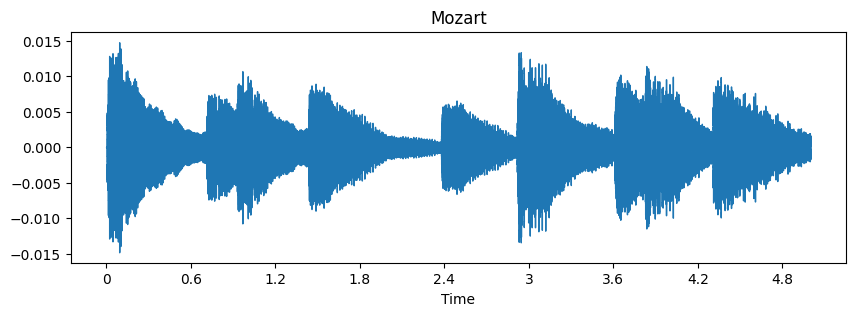

In [7]:
plt.figure(figsize=(10,3))
plt.title("Mozart")
librosa.display.waveshow(s,sr)

shape of mfcc: (20, 431)


/var/folders/vg/7d4f1ys12s17fxmrbfx48h4h0000gn/T/ipykernel_1027/2501738306.py:1: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -1.5258789e-05 ...  5.7983398e-04
  6.2561035e-04  6.5612793e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc=librosa.feature.mfcc(s,sr=sr)


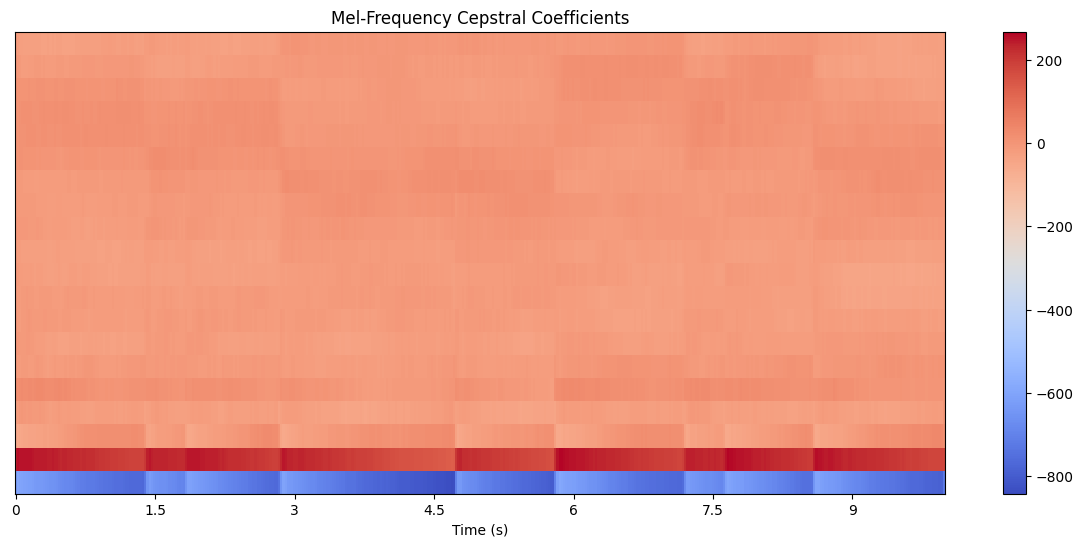

In [8]:
mfcc=librosa.feature.mfcc(s,sr=sr)
print("shape of mfcc:" ,mfcc.shape)


plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc,x_axis="s")
plt.title("Mel-Frequency Cepstral Coefficients")
plt.colorbar()

/var/folders/vg/7d4f1ys12s17fxmrbfx48h4h0000gn/T/ipykernel_1027/1153426829.py:1: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -1.5258789e-05 ...  5.7983398e-04
  6.2561035e-04  6.5612793e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma=librosa.feature.chroma_stft(s, sr=sr)


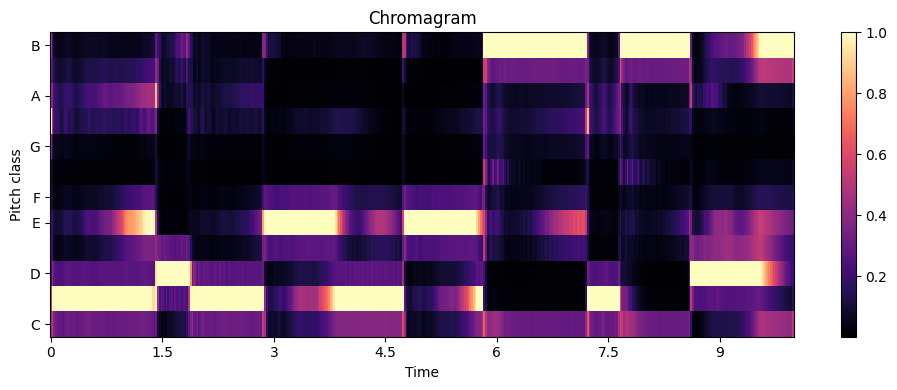

In [9]:
chroma=librosa.feature.chroma_stft(s, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [10]:
# Function to find the mfcc of the audio file
def mfcc_gen(x):
    sig , sr = librosa.load(x)
    mfcc_ = librosa.feature.mfcc(sig , sr=sr, n_mfcc=40)
    return np.array(mfcc_)
    

## Converting the .wav files into MFCC

In [13]:
ls = ['mozart','chopin', 'grieg', 'schubert', 'haydn', 'mendel']
cnt = []
labels = list(range(len(ls)))

x_mel = []
y_train = []
path_of_the_directory= DIR + 'train/'
j = 0
for i in ls:
    num = 0
    print(i)
    for filename in os.listdir(path_of_the_directory + i):
        if '.DS_Store' not in filename:
            x_mel.append(mfcc_gen(path_of_the_directory + i + '/' + filename))
            y_train.append(labels[j])
            num +=1
    #break
    cnt.append(num)
    j +=1


mozart
chopin
grieg
schubert
haydn
mendel


In [14]:
len(x_mel)

9626

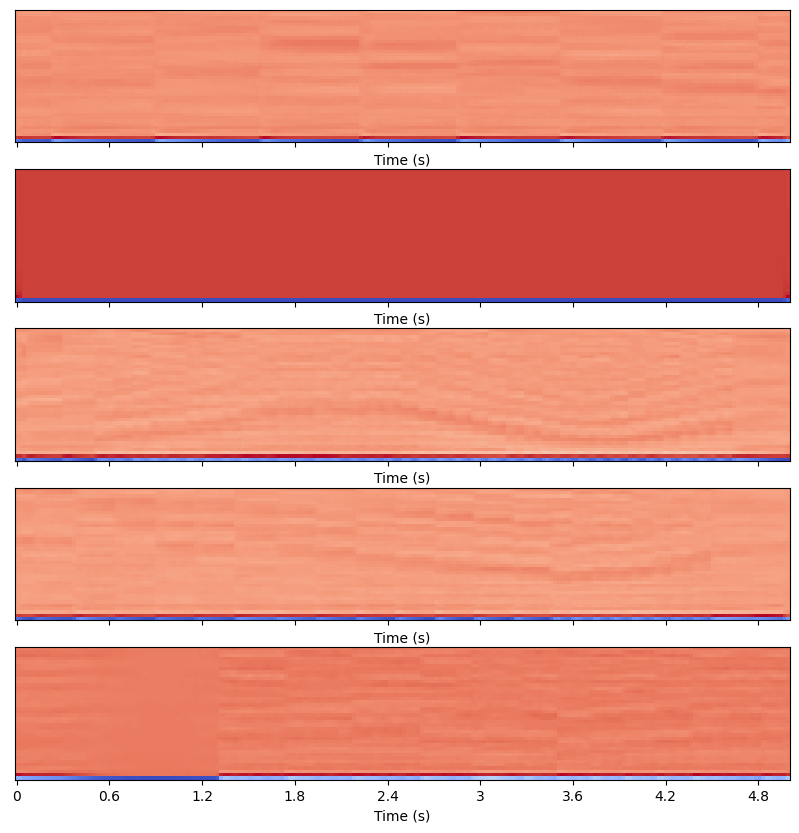

In [26]:
fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize = (10,10))
for i in range(5):
    librosa.display.specshow(x_mel[i],x_axis="s", ax=ax[i])

In [27]:
l = []
cnt = 0
for i in range(len(x_mel)):
    #print(x_mel[i].shape)
    if x_mel[i].shape not in l:
        l.append(x_mel[i].shape)
    cnt +=1

### Padding with zeros to make sure all the mfccs are of the same shape

In [28]:
x_train_pad = []
for i in range(len(x_mel)):
    target = np.zeros((216, 40))
    source = x_mel[i].T
    target[:x_mel[i].shape[1]] = source
    x_train_pad.append(target)

x_train_pad = np.array(x_train_pad)
y_train = np.array(y_train)

In [29]:
X = np.array(x_train_pad)
y = np.array(y_train)

In [30]:
X.shape

(9626, 216, 40)

In [31]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [32]:
print("X Shape is: ", X.shape)
print("y Shape is: ", y.shape)

X Shape is:  (9626, 216, 40, 1)
y Shape is:  (9626,)


In [33]:
cnt = [np.count_nonzero(y == i) for i in np.unique(y)]
cnt

[2192, 1575, 884, 2453, 1638, 884]

## Visualizing the number of songs per composers

<AxesSubplot: xlabel='Composers'>

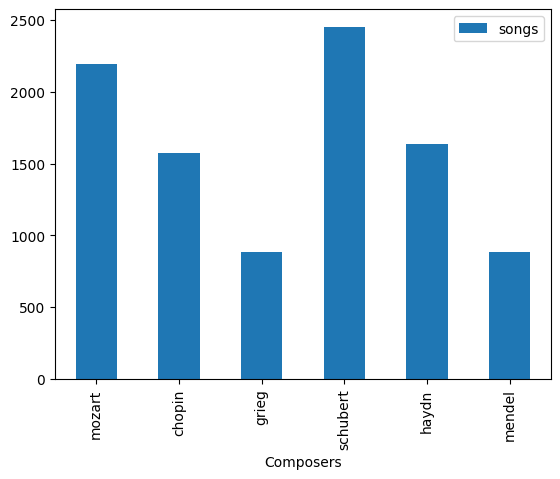

In [34]:

d = {'Composers':ls,'songs':cnt}
df = pd.DataFrame(d)
df.plot(y='songs', x='Composers', kind='bar')	

### Splitting the data into training, validation, and testing

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [36]:
#Scaling the data
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean)/std
X_valid = (X_valid - mean)/std
X_test = (X_test - mean)/std


In [37]:
X_train[0].shape

(216, 40, 1)

In [38]:
print(X_train.shape)
print(y_train.shape)

(5390, 216, 40, 1)
(5390,)


In [39]:
print(X_valid.shape)
print(y_valid.shape)

(2310, 216, 40, 1)
(2310,)


In [40]:
np.unique(y_valid)

array([0, 1, 2, 3, 4, 5])

## Convolutional Neural Network

In [41]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

model = models.Sequential([
    
                          layers.Conv2D(128 , (3,3),activation = 'relu',padding='valid', input_shape = [216, 40, 1],kernel_initializer=keras.initializers.HeNormal),  
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid',kernel_initializer=keras.initializers.HeNormal),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.2),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.2),
                          layers.Conv2D(64, (2,2), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.2),
                          layers.Conv2D(64, (2,2), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.2),
                          layers.Conv2D(32, (1,1), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.2),
                          layers.GlobalMaxPooling2D(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dropout(0.2),
                          layers.Dense(256 , activation = 'relu'),
                          layers.Dropout(0.2),
                          layers.Dense(6 , activation = 'softmax')
])



Metal device set to: Apple M1


2022-11-01 21:24:25.504414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-01 21:24:25.505967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 214, 38, 128)      1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 19, 128)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 17, 128)      147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 9, 128)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 53, 9, 128)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 7, 128)        1

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=125,
                    validation_data=(X_valid, y_valid), batch_size = 32,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/125


2022-11-01 21:24:28.391091: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-01 21:24:28.958320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - ETA: 0s - loss: 1.6043 - accuracy: 0.3332

2022-11-01 21:25:05.415005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


169/169 [==============================] - 42s 213ms/step - loss: 1.6043 - accuracy: 0.3332 - val_loss: 1.5408 - val_accuracy: 0.3948
Epoch 2/125
169/169 [==============================] - 34s 199ms/step - loss: 1.4339 - accuracy: 0.4078 - val_loss: 1.4633 - val_accuracy: 0.4190
Epoch 3/125
169/169 [==============================] - 34s 201ms/step - loss: 1.3682 - accuracy: 0.4301 - val_loss: 1.4820 - val_accuracy: 0.3870
Epoch 4/125
169/169 [==============================] - 40s 236ms/step - loss: 1.3244 - accuracy: 0.4482 - val_loss: 1.3926 - val_accuracy: 0.4550
Epoch 5/125
169/169 [==============================] - 37s 219ms/step - loss: 1.2793 - accuracy: 0.4673 - val_loss: 1.3182 - val_accuracy: 0.4887
Epoch 6/125
169/169 [==============================] - 38s 224ms/step - loss: 1.2409 - accuracy: 0.4833 - val_loss: 1.3004 - val_accuracy: 0.5052
Epoch 7/125
169/169 [==============================] - 32s 192ms/step - loss: 1.2016 - accuracy: 0.5050 - val_loss: 1.2248 - val_accurac

Epoch 57/125
169/169 [==============================] - 33s 192ms/step - loss: 0.3359 - accuracy: 0.8796 - val_loss: 0.7756 - val_accuracy: 0.7203
Epoch 58/125
169/169 [==============================] - 31s 182ms/step - loss: 0.3236 - accuracy: 0.8833 - val_loss: 0.7541 - val_accuracy: 0.7368
Epoch 59/125
169/169 [==============================] - 30s 175ms/step - loss: 0.3069 - accuracy: 0.8929 - val_loss: 0.7593 - val_accuracy: 0.7563
Epoch 60/125
169/169 [==============================] - 34s 202ms/step - loss: 0.3079 - accuracy: 0.8878 - val_loss: 0.7546 - val_accuracy: 0.7455
Epoch 61/125
169/169 [==============================] - 32s 188ms/step - loss: 0.2869 - accuracy: 0.8942 - val_loss: 0.6742 - val_accuracy: 0.7753
Epoch 62/125
169/169 [==============================] - 37s 220ms/step - loss: 0.2739 - accuracy: 0.8994 - val_loss: 0.7328 - val_accuracy: 0.7567
Epoch 63/125
169/169 [==============================] - 38s 222ms/step - loss: 0.2896 - accuracy: 0.9013 - val_loss: 0

169/169 [==============================] - 34s 200ms/step - loss: 0.1517 - accuracy: 0.9477 - val_loss: 0.6500 - val_accuracy: 0.8030
Epoch 113/125
169/169 [==============================] - 32s 187ms/step - loss: 0.1314 - accuracy: 0.9577 - val_loss: 0.6678 - val_accuracy: 0.7948
Epoch 114/125
169/169 [==============================] - 32s 187ms/step - loss: 0.1313 - accuracy: 0.9527 - val_loss: 0.7327 - val_accuracy: 0.7952
Epoch 115/125
169/169 [==============================] - 33s 194ms/step - loss: 0.1543 - accuracy: 0.9481 - val_loss: 0.7257 - val_accuracy: 0.7892
Epoch 116/125
169/169 [==============================] - 41s 240ms/step - loss: 0.1631 - accuracy: 0.9482 - val_loss: 0.7182 - val_accuracy: 0.7874
Epoch 117/125
169/169 [==============================] - 30s 180ms/step - loss: 0.1525 - accuracy: 0.9462 - val_loss: 0.6740 - val_accuracy: 0.8065
Epoch 118/125
169/169 [==============================] - 30s 178ms/step - loss: 0.1581 - accuracy: 0.9475 - val_loss: 0.6818 -

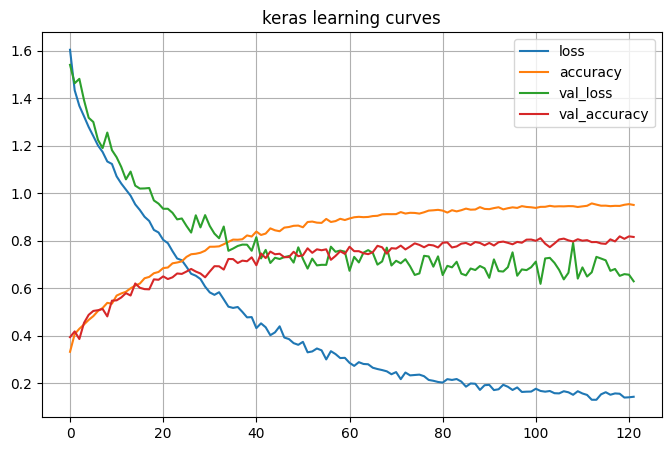

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("keras learning curves")
plt.show()

## Evaluating the Model

In [45]:
model.evaluate(X_test, y_test)

61/61 [==============================] - 3s 54ms/step - loss: 0.5828 - accuracy: 0.8167


[0.5828481316566467, 0.8167186379432678]

Classification Report
              precision    recall  f1-score   support

      mozart       0.85      0.84      0.84       446
      chopin       0.79      0.68      0.73       317
       grieg       0.85      0.89      0.87       192
    schubert       0.76      0.83      0.79       467
       haydn       0.91      0.86      0.89       329
      mendel       0.75      0.82      0.78       175

    accuracy                           0.82      1926
   macro avg       0.82      0.82      0.82      1926
weighted avg       0.82      0.82      0.82      1926



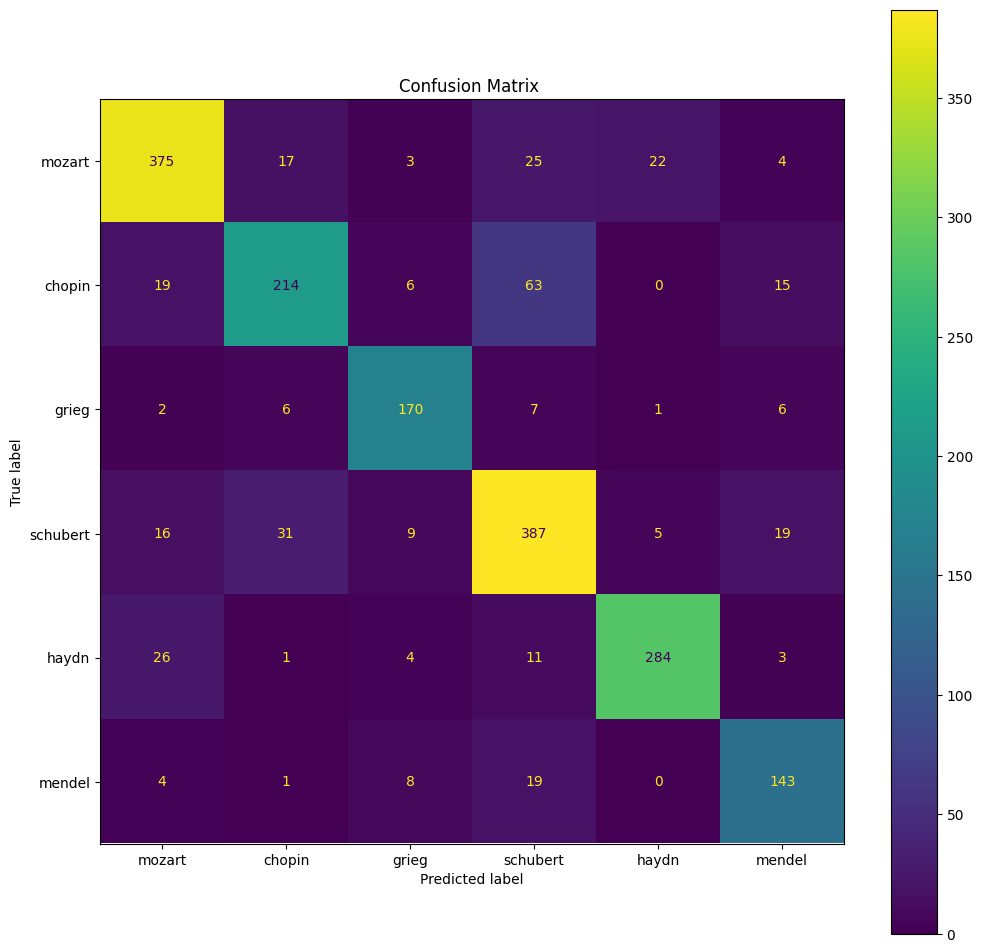

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def print_confusion (y, pred, composers):
    
    cm = confusion_matrix (y, pred,)
    np.set_printoptions(precision=2)


    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=composers)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_title('Confusion Matrix ')
    disp.plot(ax=ax)  


    
print ('Classification Report')
print_confusion(y_test, predictions, ls)
print(classification_report(y_test, predictions, target_names=ls))